In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import meijering, sato, frangi, hessian
import cv2
from scipy import ndimage as nd
from skimage import util, exposure, data
import pywt
from skimage.feature import greycomatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn import metrics
from sklearn.decomposition import PCA




In [ ]:
!gdown -q https://docs.google.com/spreadsheets/d/1iJO1lU3Iw7kbgC5rCS9TcVkC3XddHBnpvEF_nzJ6pnM/edit?usp=sharing -O All_features_combined_for_ML.csv


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(


In [ ]:
url = "https://docs.google.com/spreadsheets/d/1Kidl_v2JYZ87CQ7gf25UNSH67bCayoed4V_Nayg8zow/edit?usp=share_link"
url_for_pandas = url.replace("/edit?usp=share_link", "/export?format=xlsx")
All_features = pd.read_excel(url_for_pandas)
All_features.shape

(7563, 359)

In [ ]:
# All_features=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All_features_combined_for_ML.csv')
# All_features=All_features.iloc[:,1:]
# All_features.head(5)

In [ ]:
my_arrays_final = np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Data/numpy_data.npz', allow_pickle=True)

In [ ]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [ ]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6050, 100, 100, 1)
y_train shape: (6050,)
X_test shape: (1513, 100, 100, 1)
y_test shape: (1513,)


In [ ]:
#Reshaping images to a 100x100
X_train_r = X_train.reshape(X_train.shape[0], 100,100)
X_test_r = X_test.reshape (X_test. shape[0], 100, 100)

In [ ]:
Y=np.hstack((y_train,y_test))
Y.shape

(7563,)

In [ ]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(Y)
labels_encoded = le.transform(Y)
labels_encoded

array([2, 2, 0, ..., 0, 2, 2])

In [ ]:
All_features=All_features.iloc[:,1:]
All_features.columns = All_features.columns.map(str)
All_features.head(5)


Bins_1    Bins_2    Bins_3    Bins_4    Bins_5    Bins_6    Bins_7  \
0  0.015075  0.046351  0.042569  0.030070  0.029692  0.049055  0.056624   
1  0.000317  0.000626  0.014063  0.023360  0.029115  0.073181  0.121795   
2  0.003015  0.007830  0.005321  0.007455  0.018737  0.041415  0.070513   
3  0.000317  0.001566  0.003421  0.008698  0.023350  0.033776  0.030449   
4  0.000952  0.007830  0.084759  0.124751  0.136062  0.259349  0.360043   

     Bins_8    Bins_9   Bins_10  ...      mu21      mu12      mu03      nu20  \
0  0.040189  0.034678  0.040473  ...  0.559661  0.426303  0.535747  0.077205   
1  0.130418  0.088579  0.116838  ...  0.507501  0.483213  0.506857  0.065466   
2  0.039401  0.036562  0.070256  ...  0.523291  0.439590  0.484505  0.067712   
3  0.030339  0.023370  0.030164  ...  0.418689  0.551146  0.496898  0.062324   
4  0.229708  0.097248  0.083620  ...  0.285359  0.445845  0.630891  0.051830   

       nu11      nu02      nu30      nu21      nu12      nu03  
0  0.544002  0.160113  0.852666  0.706441  0.490703  0.445080  
1  0.537889  0.130287  0.851439  0.702253  0.498181  0.442059  
2  0.541553  0.137352  0.850137  0.703412  0.493113  0.440459  
3  0.544837  0.126923  0.852111  0.696625  0.505535  0.441356  
4  0.593454  0.266290  0.840995  0.671925  0.487977  0.465933  

[5 rows x 358 columns]

In [ ]:
All_features

Bins_1    Bins_2    Bins_3    Bins_4    Bins_5    Bins_6    Bins_7  \
0     0.015075  0.046351  0.042569  0.030070  0.029692  0.049055  0.056624   
1     0.000317  0.000626  0.014063  0.023360  0.029115  0.073181  0.121795   
2     0.003015  0.007830  0.005321  0.007455  0.018737  0.041415  0.070513   
3     0.000317  0.001566  0.003421  0.008698  0.023350  0.033776  0.030449   
4     0.000952  0.007830  0.084759  0.124751  0.136062  0.259349  0.360043   
...        ...       ...       ...       ...       ...       ...       ...   
7558  0.000793  0.005637  0.034588  0.038270  0.053041  0.135907  0.220620   
7559  0.008569  0.009396  0.021285  0.042495  0.056789  0.075995  0.092949   
7560  0.000476  0.000313  0.000760  0.000994  0.002018  0.005227  0.024573   
7561  0.009362  0.041654  0.072976  0.047962  0.047276  0.063932  0.072650   
7562  0.041098  0.109302  0.075637  0.029573  0.046988  0.071572  0.096688   

        Bins_8    Bins_9   Bins_10  ...      mu21      mu12      mu03  \
0     0.040189  0.034678  0.040473  ...  0.559661  0.426303  0.535747   
1     0.130418  0.088579  0.116838  ...  0.507501  0.483213  0.506857   
2     0.039401  0.036562  0.070256  ...  0.523291  0.439590  0.484505   
3     0.030339  0.023370  0.030164  ...  0.418689  0.551146  0.496898   
4     0.229708  0.097248  0.083620  ...  0.285359  0.445845  0.630891   
...        ...       ...       ...  ...       ...       ...       ...   
7558  0.179275  0.153411  0.103475  ...  0.514505  0.467899  0.559853   
7559  0.078408  0.071240  0.080183  ...  0.607843  0.486689  0.664402   
7560  0.044917  0.088202  0.094693  ...  0.506101  0.491178  0.516367   
7561  0.045705  0.059932  0.083238  ...  0.443843  0.492601  0.562093   
7562  0.093381  0.090464  0.089347  ...  0.585941  0.350537  0.387884   

          nu20      nu11      nu02      nu30      nu21      nu12      nu03  
0     0.077205  0.544002  0.160113  0.852666  0.706441  0.490703  0.445080  
1     0.065466  0.537889  0.130287  0.851439  0.702253  0.498181  0.442059  
2     0.067712  0.541553  0.137352  0.850137  0.703412  0.493113  0.440459  
3     0.062324  0.544837  0.126923  0.852111  0.696625  0.505535  0.441356  
4     0.051830  0.593454  0.266290  0.840995  0.671925  0.487977  0.465933  
...        ...       ...       ...       ...       ...       ...       ...  
7558  0.067484  0.541523  0.139299  0.849740  0.702804  0.496386  0.446371  
7559  0.078846  0.547300  0.151001  0.847790  0.710485  0.498437  0.457264  
7560  0.064212  0.534391  0.126023  0.853130  0.702164  0.499028  0.442754  
7561  0.073564  0.558330  0.169763  0.846519  0.697481  0.499238  0.447949  
7562  0.073429  0.532910  0.206244  0.848922  0.710272  0.476467  0.429972  

[7563 rows x 358 columns]

In [ ]:
#Spliting data into train, testidation and test datasets 
x_train, x_test,y_train, y_test = train_test_split(All_features, labels_encoded, test_size=0.30, random_state=123, shuffle = True, stratify = labels_encoded)
x_val, x_test,y_val, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1, shuffle = True, stratify = y_test)
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((5294, 358), (5294,), (1134, 358), (1134,), (1135, 358), (1135,))

Text(0, 0.5, 'Cum variance')

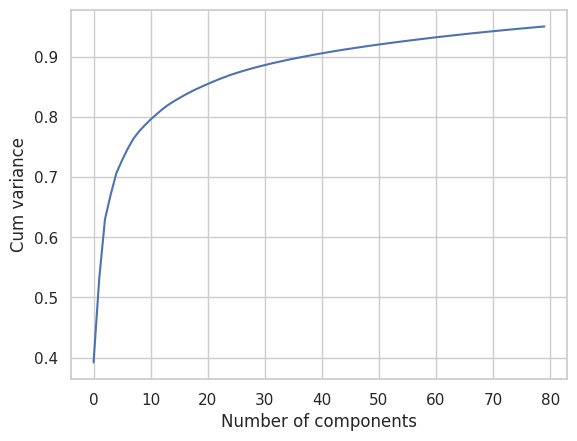

In [ ]:
pca = PCA(0.95)
pca.fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [ ]:
pca.explained_variance_

array([2.00337037, 0.71294107, 0.50189528, 0.20890105, 0.18341134,
       0.10867894, 0.09925433, 0.08449122, 0.06271094, 0.05155641,
       0.04821475, 0.04282005, 0.04158084, 0.03650721, 0.03125122,
       0.02863975, 0.02734957, 0.02553501, 0.02386503, 0.02214958,
       0.02148275, 0.02062701, 0.02008179, 0.01815394, 0.01774876,
       0.01585198, 0.01522762, 0.0140511 , 0.01367324, 0.01259452,
       0.01218945, 0.0117993 , 0.01114551, 0.01073663, 0.01050481,
       0.00981996, 0.00967983, 0.0094251 , 0.00918544, 0.00896061,
       0.00866329, 0.00839776, 0.00827133, 0.00796927, 0.00768488,
       0.00738969, 0.00731534, 0.00717175, 0.00703119, 0.00686312,
       0.00676156, 0.00654801, 0.00653073, 0.00635269, 0.0060971 ,
       0.00608182, 0.00599888, 0.0059228 , 0.00589603, 0.00584588,
       0.00575591, 0.00555433, 0.00546809, 0.00538857, 0.00531266,
       0.00520109, 0.00517961, 0.0050542 , 0.00494392, 0.00485294,
       0.00482144, 0.0047416 , 0.00468493, 0.00463064, 0.00453

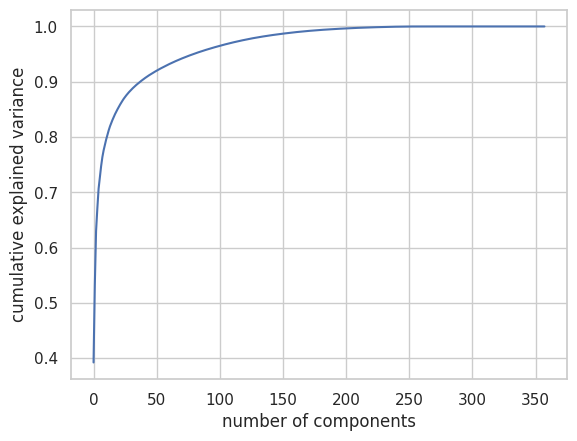

None

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.392036                  0.392036
1                    0.531550                  0.139514
2                    0.629764                  0.098215
3                    0.670644                  0.040879
4                    0.706535                  0.035891
5                    0.727802                  0.021267
6                    0.747225                  0.019423
7                    0.763759                  0.016534
8                    0.776031                  0.012272
9                    0.786120                  0.010089
10                   0.795555                  0.009435
11                   0.803934                  0.008379
12                   0.812071                  0.008137
13                   0.819215                  0.007144
14                   0.825331                  0.006115

In [ ]:
pca_test = PCA(n_components=x_train.shape[1])
pca_test.fit(x_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(15))

In [ ]:
pca = PCA(.95)
X_train = pca.fit_transform(x_train)
X_val = pca.transform(x_val)
X_train.shape

(5294, 80)

In [ ]:
X_train.shape

(5294, 80)

In [ ]:
X_test = pca.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,50,200],
              'max_features':[1,3,5,10],
              'min_samples_leaf':[1,2,10],
              'min_samples_split':[1,2,10]
           }
grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 10],
                         'min_samples_split': [1, 2, 10],
                         'n_estimators': [10, 50, 200]},
             scoring='accuracy')

In [ ]:
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 10],
                         'min_samples_split': [1, 2, 10],
                         'n_estimators': [10, 50, 200]},
             scoring='accuracy')

In [ ]:
Zgrid.best_estimator_

In [ ]:
y_pred = grid.predict(X_test)
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

In [ ]:
y_pred = grid.predict(X_val)

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_val, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_val, y_pred), 4))
print(metrics.classification_report(y_val, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[241  85  46]
 [ 77 174 127]
 [ 37  84 263]]
Accuracy: 0.5979
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       372
           1       0.51      0.46      0.48       378
           2       0.60      0.68      0.64       384

    accuracy                           0.60      1134
   macro avg       0.60      0.60      0.60      1134
weighted avg       0.60      0.60      0.60      1134



In [ ]:
from sklearn.manifold import TSNE
m = TSNE (learning_rate=50)

In [ ]:
tsne_features = m. fit_transform(X_train)

In [ ]:
df=pd.DataFrame()

In [ ]:
df['X'] = tsne_features[:, 0]
df['Y'] = tsne_features[:, 1]

In [ ]:
import seaborn as sns
sns.scatterplot(x="X", y="Y",hue='y_train' data=df)
plt.show ()

SyntaxError: ignored

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=ae669962841355ebcd3cfa07bf05acde1f829223e14d6cc52300453c31dcf50c
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=96375180ae3f5b012f7c87eae2f4411d98ba278a7880a477838ed2c6cf0b0ff2
  Stored in directory: /root/.ca

In [ ]:
from umap import UMAP
import plotly.express as px


features = X_train
umap_2d = UMAP(n_components=2, init='random', random_state=0)
# umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
# proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y_train,
    #  x="CMPT1", y="CMPT2"
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.species, labels={'color': 'species'}
# )
# fig_3d.update_traces(marker_size=5)
# plt.xlabel('CMPT1')
# plt.ylabel('CMPT2')
fig_2d.show()
# fig_3d.show()

In [ ]:
df = pd.DataFrame(proj_2d, columns = ['CMPT1','CMPT2'])
df

CMPT1      CMPT2
0     3.370093   5.737734
1     2.105582   8.610651
2     9.316282   0.578815
3     8.571964  -5.598294
4     2.079032   6.262734
...        ...        ...
5289  3.983985  11.556666
5290  4.657042   6.411865
5291  5.801664   1.600297
5292  7.120487  -1.094997
5293  6.672120  -0.729313

[5294 rows x 2 columns]

In [ ]:
fig_2d = px.scatter(
    df, x='CMPT1', y='CMPT2',title="PCA",
    color=y_train.astype(int),
    #  x="CMPT1", y="CMPT2"
)

fig_2d.show()
# fig_3d.show()

In [ ]:
from matplotlib.colors import ListedColormap

<ipython-input-54-20d80ba8de81>:9: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



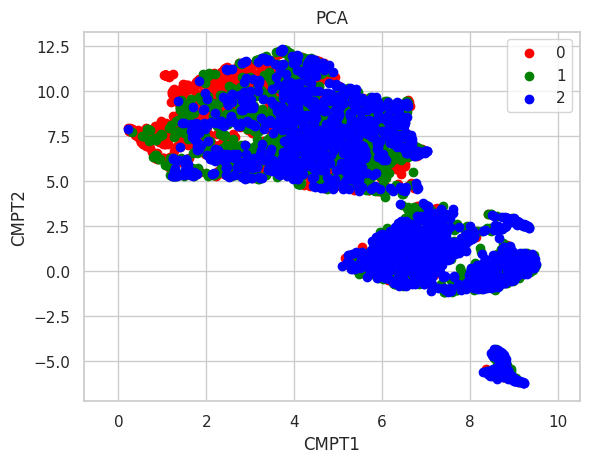

In [ ]:
X_set, y_set = proj_2d, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('PCA')
plt.xlabel('CMPT1')
plt.ylabel('CMPT2')
plt.legend()
plt.show()

In [ ]:
from dash import Dash, dcc, html, Input, Output
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Visualization of PCA's explained variance"),
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=5, value=3, step=1)
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider", "value"))
def run_and_plot(n_components):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(X_train)

    var = pca.explained_variance_ratio_.sum() * 100

    labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}
    labels['color'] = 'Median Price'

    fig = px.scatter_matrix(
        components,
        color=boston.target,
        dimensions=range(n_components),
        labels=labels,
        title=f'Total Explained Variance: {var:.2f}%')
    fig.update_traces(diagonal_visible=False)
    return fig


app.run_server(debug=True)

In [ ]:
proj_2d

numpy.ndarray

In [ ]:
# from umap import UMAP
# import plotly.express as px


features = X_train

umap_3d = UMAP(n_components=3, init='random', random_state=0)


proj_3d = umap_3d.fit_transform(features)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()

AttributeError: ignored

In [ ]:
# features = X_train
# umap_2d = UMAP(n_components=2, init='random', random_state=0)
# umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X_val)
# proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y_val
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.species, labels={'color': 'species'}
# )
# fig_3d.update_traces(marker_size=5)

fig_2d.show()
# fig_3d.show()

In [ ]:
# features = X_train
# umap_2d = UMAP(n_components=2, init='random', random_state=0)
# umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X_test)
# proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y_test
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.species, labels={'color': 'species'}
# )
# fig_3d.update_traces(marker_size=5)

fig_2d.show()
# fig_3d.show()

<ipython-input-52-3b188bfa56c5>:10: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



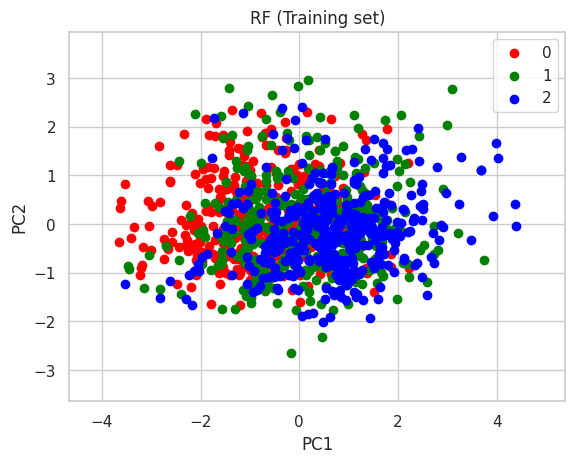

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_val, y_val
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('RF (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
y_pred.shape, X_test.shape

((1135,), (1135, 80))

In [ ]:
# Confusion matrix:
#  [[251  66  55]
#  [ 90 163 125]
#  [ 62  79 244]]
# Accuracy: 0.5797
#               precision    recall  f1-score   support

#            0       0.62      0.67      0.65       372
#            1       0.53      0.43      0.48       378
#            2       0.58      0.63      0.60       385

#     accuracy                           0.58      1135
#    macro avg       0.58      0.58      0.58      1135
# weighted avg       0.58      0.58      0.58      1135

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[251  66  55]
 [ 90 163 125]
 [ 62  79 244]]
Accuracy: 0.5797
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       372
           1       0.53      0.43      0.48       378
           2       0.58      0.63      0.60       385

    accuracy                           0.58      1135
   macro avg       0.58      0.58      0.58      1135
weighted avg       0.58      0.58      0.58      1135



In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[251  66  55]
 [ 90 163 125]
 [ 62  79 244]]
Accuracy: 0.5797
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       372
           1       0.53      0.43      0.48       378
           2       0.58      0.63      0.60       385

    accuracy                           0.58      1135
   macro avg       0.58      0.58      0.58      1135
weighted avg       0.58      0.58      0.58      1135



<Axes: >

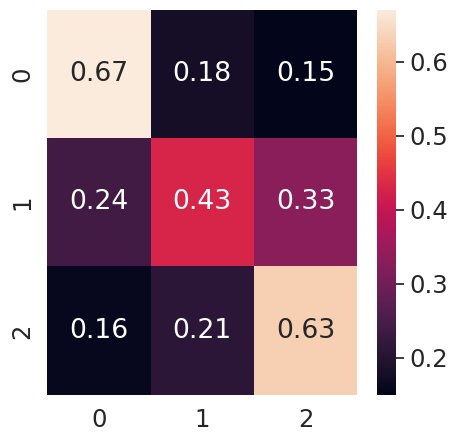

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import math
cm = confusion_matrix(y_test, y_pred)
cm_norm = (cm / cm.sum(axis=1).reshape(-1,1)).round(decimals = 2)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm_norm, annot=True, ax=ax)

In [ ]:
features = X_val
umap_2d = UMAP(n_components=2, init='random', random_state=0)
# umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
# proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y_val
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.species, labels={'color': 'species'}
# )
# fig_3d.update_traces(marker_size=5)

fig_2d.show()
# fig_3d.show()

<ipython-input-55-92c02037ef5e>:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



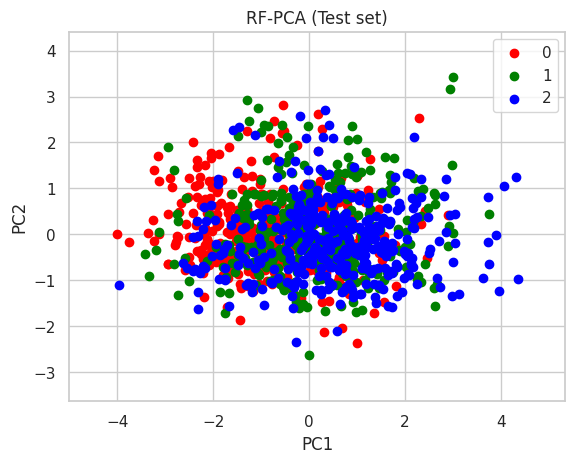

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),)

# plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('RF-PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
from sklearn import linear_model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',C=0.3593813663804626, max_iter=1000)
mul_lr.fit(X_train, y_train)

LogisticRegression(C=0.3593813663804626, max_iter=1000,
                   multi_class='multinomial', solver='newton-cg')

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000]
    }
]

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


540 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, max_iter=1000, penalty='l1',
                   solver='saga')

In [ ]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial',C=1.623776739188721, max_iter=1000, penalty='l1', solver='saga')
mul_lr.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, max_iter=1000,
                   multi_class='multinomial', penalty='l1', solver='saga')

In [ ]:
y_pred = mul_lr.predict(X_train)

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_train, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_train, y_pred), 4))
print(metrics.classification_report(y_train, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[1160  330  245]
 [ 507  627  632]
 [ 235  400 1158]]
Accuracy: 0.5563
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1735
           1       0.46      0.36      0.40      1766
           2       0.57      0.65      0.61      1793

    accuracy                           0.56      5294
   macro avg       0.55      0.56      0.55      5294
weighted avg       0.55      0.56      0.55      5294



In [ ]:
y_pred = mul_lr.predict(X_val)

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_val, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_val, y_pred), 4))
print(metrics.classification_report(y_val, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[245  72  55]
 [ 99 126 153]
 [ 42  90 252]]
Accuracy: 0.5494
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       372
           1       0.44      0.33      0.38       378
           2       0.55      0.66      0.60       384

    accuracy                           0.55      1134
   macro avg       0.54      0.55      0.54      1134
weighted avg       0.54      0.55      0.54      1134



In [ ]:
y_pred = mul_lr.predict(X_test)

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[245  74  53]
 [104 134 140]
 [ 71  85 229]]
Accuracy: 0.5357
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       372
           1       0.46      0.35      0.40       378
           2       0.54      0.59      0.57       385

    accuracy                           0.54      1135
   macro avg       0.53      0.54      0.53      1135
weighted avg       0.53      0.54      0.53      1135



<Axes: >

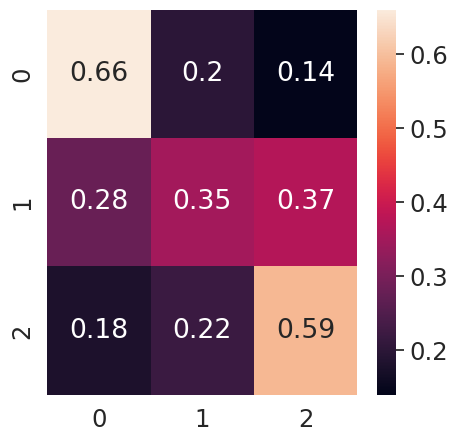

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import math
cm = confusion_matrix(y_test, y_pred)
cm_norm = (cm / cm.sum(axis=1).reshape(-1,1)).round(decimals = 2)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm_norm, annot=True, ax=ax)

In [ ]:
import plotly.express as px

In [ ]:
X_train.shape

(5294, 80)

In [ ]:
pca.explained_variance_ratio_.shape

(80,)

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [ ]:
fig = px.scatter_matrix(
    X_train,
    labels=labels,
    dimensions=range(80),
    color=y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(x_train)
X_val = ss_X.transform(x_val)

In [ ]:
X_train, x_train

In [ ]:
X_train = lda.fit_transform(X_train, y_train)
X_val = lda.transform(X_val)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_val = label_binarizer.transform(y_val)
y_onehot_val.shape  # (n_samples, n_classes)

In [ ]:
y_onehot_val

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_val[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [ ]:
fpr, tpr, thresholds=metrics.roc_curve(y_val,val_prediction)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

In [ ]:
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(x_train, y_train).transform(X)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
plt.scatter(X_r2[:,0],X_r2[:,1],c=vectorizer(y))

In [ ]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

In [ ]:
from pylab import *
subplot(2,1,1)
title("PCA")
plt.scatter(X_r[:,0],X_r[:,1],c=vectorizer(y))
subplot(2,1,2)
title("LDA")
plt.scatter(X_r2[:,0],X_r2[:,1],c=vectorizer(y))

In [ ]:
import seaborn as sns
df=pd.DataFrame(zip(X_r[:,0],X_r[:,1],X_r2[:,0],X_r2[:,1],y),columns=["pc1","pc2","ld1","ld2","class"])

In [ ]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr.fit(x_train, y_train)

In [ ]:
print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(x_train)))
print("Multinomial Logistic regression Validation Accuracy :: ", metrics.accuracy_score(y_val, mul_lr.predict(x_val)))

In [ ]:
import numpy as np

from sklearn import linear_model
from sklearn.svm import l1_min_c


In [ ]:
cs = l1_min_c(x_train, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="newton-cg",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(x_train, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth=4, min_samples_split=5)
dt.fit(x_train,y_train)

In [ ]:
fi_col = []
fi = []

for i,column in enumerate(x_train):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

In [ ]:
# Creating a Dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df
# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Training my model

log_reg = LogisticRegression(penalty='l2',random_state=10, solver = 'newton-cg')

log_reg.fit(x_train, y_train)

In [ ]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_val, y_val))


# Classification Report
print(classification_report(y_train, y_pred))

# Multinomial Logistic regression Train Accuracy ::  0.5910464676992822
# Multinomial Logistic regression Validation Accuracy ::  0.5493827160493827

In [ ]:
#Predict on train
train_prediction = log_reg.predict(x_train)
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_train, train_prediction))
print ("Accuracy = ", classification_report(y_train, train_prediction))

In [ ]:
#Predict on val
# val_PCA = pca.transform(x_val) 
val_prediction = log_reg.predict(x_val)
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(y_val, val_prediction))
print ("Accuracy = ", classification_report(y_val, val_prediction))

In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
import math
cm = confusion_matrix(y_val, val_prediction)
cm_norm = (cm / cm.sum(axis=1).reshape(-1,1)).round(decimals = 2)

fig, ax = plt.subplots(figsize=(5,5))        
sns.set(font_scale=1.6)
sns.heatmap(cm_norm, annot=True, ax=ax)

In [ ]:
log_reg.classes_

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(x_val)
print("The Log Loss on Validation Dataset is: ", log_loss(y_val, pred_proba_t))

In [ ]:
np.geomspace(1e-5, 1e5, num=20)

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'newton-cg', C=c)
    log_reg2.fit(x_train, y_train)
    score = log_reg2.score(x_val, y_val)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(x_val)
    log_loss2 = log_loss(y_val, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='newton-cg')
Log_reg3.fit(x_train, y_train)
print("The CA is:", Log_reg3.score(x_val, y_val))
pred_proba_t = Log_reg3.predict_proba(x_val)
log_loss3 = log_loss(y_val, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

In [ ]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970,max_iter=1000)
log_reg3.fit(x_train, y_train)
score = log_reg3.score(x_test, y_test)

pred_proba_t = log_reg3.predict_proba(x_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)